**Kernel:** This notebook uses `torch`. Use the project's uv environment so the kernel sees it:
- **Select Kernel** (top right) → **Python Environments** → choose the interpreter from this repo's **`.venv`** (e.g. `STAT-4830-NAPPERS-project\.venv\Scripts\python.exe`).
- Or from the project root run: `uv run jupyter notebook` and open this notebook there.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv(r'../crsp/sp500_daily.csv')
df1.head()

C:\Users\Patrick\AppData\Local\Temp\ipykernel_4336\756145761.py:1: DtypeWarning: Columns (0: iid) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r'../crsp/sp500_daily.csv')


,Unnamed: 0,date,permno,comnam,ncusip,shrcd,exchcd,hsiccd,ticker,gvkey,iid,start,ending,ret,retx,prc,shrout,vol,cfacpr,cfacshr
0,1,2000-01-03,11703,DU PONT E I DE NEMOURS & CO,26353410,11,1,2879,DD,4087,1,1957-03-01,2017-08-31,-0.013283,-0.013283,65.0000,1043131.0,2791500.0,1.053752,1.0
1,2,2000-01-03,24766,NORTHROP GRUMMAN CORP,66680710,11,1,3812,NOC,7985,1,1985-06-13,2024-12-31,-0.021965,-0.021965,52.8750,69489.0,152100.0,2.220592,2.0
2,4,2000-01-03,24563,TEXAS UTILITIES CO,88284810,11,1,4911,TXU,10507,1,1957-03-01,2007-10-09,-0.028120,-0.028120,34.5625,276407.0,1029700.0,2.000000,2.0
3,5,2000-01-03,40416,AVON PRODUCTS INC,05430310,11,1,2844,AVP,1920,1,1967-05-18,2015-03-20,-0.037879,-0.037879,31.7500,242304.0,944400.0,2.000000,2.0
4,6,2000-01-03,26710,LOEWS CORP,54042410,11,1,6331,LTR,6781,1,1995-05-10,2024-12-31,-0.026777,-0.026777,59.0625,106050.0,413700.0,6.000000,6.0


In [3]:
# Parse dates and sort
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.sort_values(['date', 'permno'])

# Optional: keep only common shares on main exchanges (standard CRSP filters)
if 'shrcd' in df1.columns:
    df1 = df1[df1['shrcd'].isin([10, 11])]
if 'exchcd' in df1.columns:
    df1 = df1[df1['exchcd'].isin([1, 2, 3])]

# Drop missing returns
df1 = df1.dropna(subset=['ret'])

print("Unique dates:", df1['date'].nunique())
print("Unique permnos:", df1['permno'].nunique())

# Pick a stable small universe: permnos with the longest history
counts = df1.groupby('permno')['date'].nunique().sort_values(ascending=False)
K_UNIVERSE = 30   # you can tweak this (20–50 is fine for Week 3)
universe_permnos = counts.head(K_UNIVERSE).index.tolist()

df_sub = df1[df1['permno'].isin(universe_permnos)].copy()

# Date x permno matrix of returns
ret_panel = df_sub.pivot(index='date', columns='permno', values='ret').sort_index()

# Drop any dates with missing returns in this universe (simplest approach)
ret_panel = ret_panel.dropna(how='any')

print("Panel shape (T x N):", ret_panel.shape)
ret_panel.head()


Unique dates: 6289
Unique permnos: 978
Panel shape (T x N): (6289, 30)


permno,10104,10107,10138,10145,10516,11404,11674,11850,11955,12052,...,54148,55976,56274,56573,57568,57665,57904,58246,58683,59176
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.054099,-0.001606,-0.049069,-0.017335,-0.010309,-0.021739,-0.049407,-0.029480,0.010909,-0.069905,...,-0.061111,-0.032550,0.008264,-0.054579,0.011111,-0.029004,-0.051656,-0.047759,-0.015504,-0.054135
2000-01-04,-0.088360,-0.033780,-0.030249,-0.017641,-0.010417,0.012963,0.002079,-0.017586,-0.003597,0.042038,...,-0.047337,-0.039252,-0.019126,-0.045010,-0.032967,-0.054546,-0.026536,-0.065016,-0.027559,-0.037758
2000-01-05,-0.052815,0.010544,-0.001835,-0.013468,-0.015790,0.045704,0.031120,0.054516,0.003610,0.068460,...,-0.018634,-0.019455,-0.016713,0.012295,0.017857,0.057692,-0.005739,0.022517,-0.004049,-0.025361
2000-01-06,-0.058824,-0.033498,0.029412,0.019340,0.005348,0.001748,-0.004024,0.049383,-0.007194,0.003432,...,-0.006329,0.010913,0.028329,-0.007085,0.015949,-0.005195,0.020202,0.020725,-0.004065,0.020374
2000-01-07,0.076823,0.013068,-0.007143,0.053571,0.015957,0.006981,0.010101,-0.000735,-0.039855,0.026226,...,0.015924,0.075564,0.022039,0.064220,-0.028258,0.000000,0.019802,0.012690,0.036735,0.014559


In [4]:
# HW1 implementation adapted for daily data: optimizer and hyperparameters
import torch

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

portfolio_returns = []
benchmark_returns = []
weight_history = []
w_prev = None

# Hyperparameters for DAILY data (trading days)
ROLLING_WINDOW = 504   # ~2 years of trading days to estimate mu, Sigma
GAMMA = 5.0           # risk aversion
KAPPA = 0.1           # turnover penalty strength
LR = 0.1              # learning rate
STEPS = 200           # gradient steps per rebalance

dates = ret_panel.index.to_list()
permnos = ret_panel.columns.to_list()
N = len(permnos)
print(f"#dates in panel: {len(dates)}, #assets in universe: {N}")


def estimate_moments(window_returns: pd.DataFrame):
    """window_returns: (T_window x N) DataFrame of past returns. Returns mu_t (N,), Sigma_t (N, N)."""
    mu_t = window_returns.mean(axis=0).values
    Sigma_t = window_returns.cov().values
    Sigma_t = 0.5 * (Sigma_t + Sigma_t.T)
    Sigma_t = Sigma_t + 1e-6 * np.eye(Sigma_t.shape[0])
    return mu_t, Sigma_t


def optimize_weights(mu_t, Sigma_t, w_prev=None):
    """Max_w mu'w - gamma w'Sigma w - kappa ||w - w_prev||_1 s.t. w in simplex (PyTorch softmax)."""
    mu_t_t = torch.tensor(mu_t, dtype=torch.float32, device=DEVICE)
    Sigma_t_t = torch.tensor(Sigma_t, dtype=torch.float32, device=DEVICE)
    current_N = mu_t.shape[0]
    if w_prev is None:
        w_prev_np = np.ones(current_N) / current_N
    else:
        w_prev_np = w_prev
    w_prev_t = torch.tensor(w_prev_np, dtype=torch.float32, device=DEVICE)
    v = torch.log(w_prev_t + 1e-8).detach().clone().requires_grad_(True)
    optimizer = torch.optim.SGD([v], lr=LR)
    for _ in range(STEPS):
        optimizer.zero_grad()
        w = torch.softmax(v, dim=0)
        exp_ret = (mu_t_t * w).sum()
        var = w @ Sigma_t_t @ w
        turnover = torch.abs(w - w_prev_t).sum()
        loss = -(exp_ret - GAMMA * var - KAPPA * turnover)
        loss.backward()
        optimizer.step()
    return torch.softmax(v, dim=0).detach().cpu().numpy()

#dates in panel: 6289, #assets in universe: 30


In [6]:
# Rolling backtest: at each date use past ROLLING_WINDOW days to estimate moments, optimize, then realize next-day return
end = len(dates)
for t_idx in range(ROLLING_WINDOW, end - 1):
    window_dates = dates[t_idx - ROLLING_WINDOW : t_idx]
    date_t = dates[t_idx]
    date_next = dates[t_idx + 1]
    window_ret = ret_panel.loc[window_dates]
    mu_t, Sigma_t = estimate_moments(window_ret)
    w_t = optimize_weights(mu_t, Sigma_t, w_prev=w_prev)
    w_prev = w_t
    weight_history.append((date_t, w_t))
    r_next = ret_panel.loc[date_next].values
    port_ret = np.dot(w_t, r_next)
    ew = np.ones(N) / N
    bench_ret = np.dot(ew, r_next)
    portfolio_returns.append(port_ret)
    benchmark_returns.append(bench_ret)

    if t_idx %100 ==0:
        print(f"Backtest: {t_idx}/{end} rebalance dates (daily).")
print(f"Backtest: {len(portfolio_returns)} rebalance dates (daily).")

Backtest: 600/6289 rebalance dates (daily).
Backtest: 700/6289 rebalance dates (daily).
Backtest: 800/6289 rebalance dates (daily).
Backtest: 900/6289 rebalance dates (daily).
Backtest: 1000/6289 rebalance dates (daily).
Backtest: 1100/6289 rebalance dates (daily).
Backtest: 1200/6289 rebalance dates (daily).
Backtest: 1300/6289 rebalance dates (daily).
Backtest: 1400/6289 rebalance dates (daily).
Backtest: 1500/6289 rebalance dates (daily).
Backtest: 1600/6289 rebalance dates (daily).
Backtest: 1700/6289 rebalance dates (daily).
Backtest: 1800/6289 rebalance dates (daily).
Backtest: 1900/6289 rebalance dates (daily).
Backtest: 2000/6289 rebalance dates (daily).
Backtest: 2100/6289 rebalance dates (daily).
Backtest: 2200/6289 rebalance dates (daily).
Backtest: 2300/6289 rebalance dates (daily).
Backtest: 2400/6289 rebalance dates (daily).
Backtest: 2500/6289 rebalance dates (daily).
Backtest: 2600/6289 rebalance dates (daily).
Backtest: 2700/6289 rebalance dates (daily).
Backtest: 2800

Optimized portfolio (daily data):
  mean_ret_daily: 0.0006
  vol_annual: 0.2011
  sharpe_annual: 0.7043
  max_drawdown: -0.4798
  cum_return: 20.2799

Equal-weight benchmark:
  mean_ret_daily: 0.0006
  vol_annual: 0.2018
  sharpe_annual: 0.7024
  max_drawdown: -0.4792
  cum_return: 20.2581


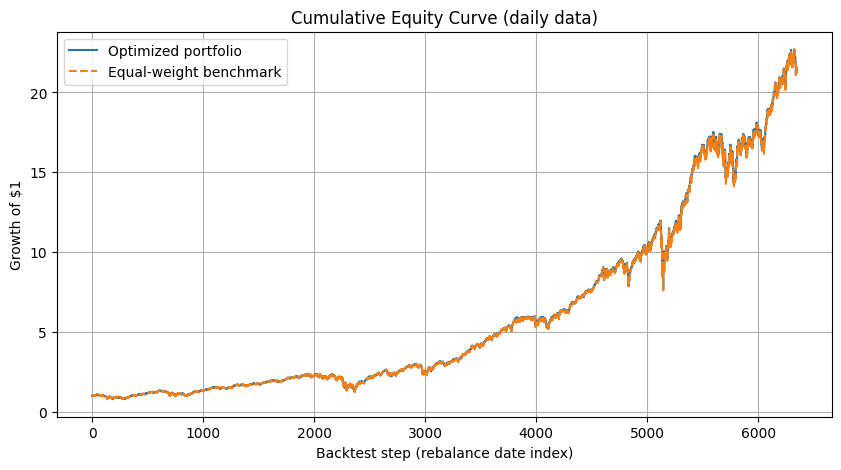

In [7]:
import matplotlib.pyplot as plt

def performance_metrics(returns, freq=252):
    """Annualization for daily returns: freq=252."""
    returns = np.asarray(returns)
    mean_ret = returns.mean()
    std_ret = returns.std(ddof=1)
    sharpe = np.sqrt(freq) * mean_ret / std_ret if std_ret > 0 else np.nan
    vol_annual = std_ret * np.sqrt(freq)
    equity = (1 + returns).cumprod()
    running_max = np.maximum.accumulate(equity)
    drawdown = equity / running_max - 1.0
    max_dd = drawdown.min()
    total_cum_ret = equity[-1] - 1.0
    return {
        "mean_ret_daily": mean_ret,
        "vol_annual": vol_annual,
        "sharpe_annual": sharpe,
        "max_drawdown": max_dd,
        "cum_return": total_cum_ret,
        "equity_curve": equity,
    }

port_ret_arr = np.array(portfolio_returns)
bench_ret_arr = np.array(benchmark_returns)
metrics_port = performance_metrics(port_ret_arr, freq=252)
metrics_bench = performance_metrics(bench_ret_arr, freq=252)

print("Optimized portfolio (daily data):")
for k, v in metrics_port.items():
    if k != "equity_curve":
        print(f"  {k}: {v:.4f}")
print("\nEqual-weight benchmark:")
for k, v in metrics_bench.items():
    if k != "equity_curve":
        print(f"  {k}: {v:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(metrics_port["equity_curve"], label="Optimized portfolio")
plt.plot(metrics_bench["equity_curve"], label="Equal-weight benchmark", linestyle="--")
plt.title("Cumulative Equity Curve (daily data)")
plt.xlabel("Backtest step (rebalance date index)")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.legend()
plt.show()

In [8]:
# Weight and turnover summary
dates_bt = [d for d, _ in weight_history]
W = np.stack([w for _, w in weight_history])
print("Weight matrix shape:", W.shape)

avg_weights = W.mean(axis=0)
weight_summary = pd.DataFrame({"permno": permnos, "avg_weight": avg_weights}).sort_values("avg_weight", ascending=False)
display(weight_summary.head(10))

ew = np.ones(N) / N
avg_l1_dist = np.mean(np.abs(W - ew).sum(axis=1))
turnover_series = np.abs(np.diff(W, axis=0)).sum(axis=1)
print("Average L1 distance from equal-weight:", avg_l1_dist)
print("Average turnover per rebalance:", turnover_series.mean())

Weight matrix shape: (6347, 30)


,permno,avg_weight
6,11674,0.034884
22,56274,0.034873
11,48506,0.034663
4,10516,0.034443
12,48653,0.034368
24,57568,0.034354
25,57665,0.034322
5,11404,0.034121
8,11955,0.033921
23,56573,0.033756


Average L1 distance from equal-weight: 0.02306176172838896
Average turnover per rebalance: 0.00016379518


## Grid Search: Reduce Equal-Weight Bias

**Plan:** Lower KAPPA (reduce turnover penalty), add shrinkage for μ/Σ, and grid search over parameters.
Using a **small sample** (first ~1200 days) to reproduce and diagnose the equal-weight behavior.

In [ ]:
def estimate_moments_shrinkage(window_returns: pd.DataFrame, shrink_mu: float = 0.5, shrink_Sigma: float = 0.3):
    """Shrink mu toward zero and Sigma toward diagonal to reduce noise in small samples."""
    mu_t = window_returns.mean(axis=0).values
    Sigma_t = window_returns.cov().values
    Sigma_t = 0.5 * (Sigma_t + Sigma_t.T)
    Sigma_t = Sigma_t + 1e-6 * np.eye(Sigma_t.shape[0])
    # Shrink mu toward 0
    mu_t = (1 - shrink_mu) * mu_t
    # Shrink Sigma toward diagonal (Ledoit-Wolf style)
    d = np.diag(np.diag(Sigma_t))
    Sigma_t = (1 - shrink_Sigma) * Sigma_t + shrink_Sigma * d
    return mu_t, Sigma_t

def optimize_weights_param(mu_t, Sigma_t, gamma, kappa, lr=0.1, steps=200, w_prev=None):
    """Parameterized optimizer: Max_w mu'w - gamma*w'Sigma*w - kappa*|w-w_prev|."""
    mu_t_t = torch.tensor(mu_t, dtype=torch.float32, device=DEVICE)
    Sigma_t_t = torch.tensor(Sigma_t, dtype=torch.float32, device=DEVICE)
    N = mu_t.shape[0]
    if w_prev is None:
        w_prev_np = np.ones(N) / N
    else:
        w_prev_np = w_prev
    w_prev_t = torch.tensor(w_prev_np, dtype=torch.float32, device=DEVICE)
    v = torch.log(w_prev_t + 1e-8).detach().clone().requires_grad_(True)
    optimizer = torch.optim.SGD([v], lr=lr)
    for _ in range(steps):
        optimizer.zero_grad()
        w = torch.softmax(v, dim=0)
        loss = -( (mu_t_t * w).sum() - gamma * (w @ Sigma_t_t @ w) - kappa * torch.abs(w - w_prev_t).sum() )
        loss.backward()
        optimizer.step()
    return torch.softmax(v, dim=0).detach().cpu().numpy()

def run_backtest_param(ret_panel_sub, dates_sub, gamma, kappa, rolling_window, lr=0.1, use_shrinkage=False):
    """Run backtest with given params. Returns (portfolio_returns, weight_history)."""
    port_ret, wh = [], []
    w_prev = None
    N = ret_panel_sub.shape[1]
    ew = np.ones(N) / N
    end = len(dates_sub)
    for t_idx in range(rolling_window, end - 1):
        window_dates = dates_sub[t_idx - rolling_window : t_idx]
        window_ret = ret_panel_sub.loc[window_dates]
        if use_shrinkage:
            mu_t, Sigma_t = estimate_moments_shrinkage(window_ret)
        else:
            mu_t = window_ret.mean(axis=0).values
            Sigma_t = window_ret.cov().values
            Sigma_t = 0.5 * (Sigma_t + Sigma_t.T) + 1e-6 * np.eye(N)
        w_t = optimize_weights_param(mu_t, Sigma_t, gamma, kappa, lr=lr, w_prev=w_prev)
        w_prev = w_t
        wh.append(w_t)
        r_next = ret_panel_sub.loc[dates_sub[t_idx + 1]].values
        port_ret.append(np.dot(w_t, r_next))
    return np.array(port_ret), np.stack(wh)

In [10]:
# Small sample: first ~1200 trading days
SAMPLE_DAYS = 1200
ret_panel_small = ret_panel.iloc[:SAMPLE_DAYS]
dates_small = ret_panel_small.index.to_list()
N_small = ret_panel_small.shape[1]
ew_vec = np.ones(N_small) / N_small

# Grid search parameter space
param_grid = {
    "gamma": [2.0, 5.0, 10.0],
    "kappa": [0.001, 0.01, 0.1],
    "rolling_window": [252, 504],
    "use_shrinkage": [False, True],
}

from itertools import product
results = []
for gamma, kappa, rw, shrink in product(
    param_grid["gamma"],
    param_grid["kappa"],
    param_grid["rolling_window"],
    param_grid["use_shrinkage"],
):
    if rw >= SAMPLE_DAYS - 50:
        continue  # need enough history
    try:
        port_ret, W = run_backtest_param(
            ret_panel_small, dates_small, gamma, kappa, rw, use_shrinkage=shrink
        )
        sharpe = np.sqrt(252) * port_ret.mean() / port_ret.std() if port_ret.std() > 0 else np.nan
        l1_ew = np.mean(np.abs(W - ew_vec).sum(axis=1))
        turnover = np.abs(np.diff(W, axis=0)).sum(axis=1).mean()
        results.append({
            "gamma": gamma, "kappa": kappa, "rolling_window": rw, "shrinkage": shrink,
            "sharpe_annual": sharpe, "l1_from_ew": l1_ew, "avg_turnover": turnover,
            "mean_ret": port_ret.mean(), "vol": port_ret.std(),
        })
        print(f"gamma={gamma} kappa={kappa} rw={rw} shrink={shrink} -> Sharpe={sharpe:.3f} L1_EW={l1_ew:.4f}")
    except Exception as e:
        print(f"gamma={gamma} kappa={kappa} rw={rw} shrink={shrink} -> FAIL: {e}")

grid_df = pd.DataFrame(results)

gamma=2.0 kappa=0.001 rw=252 shrink=False -> Sharpe=0.470 L1_EW=0.0755
gamma=2.0 kappa=0.001 rw=252 shrink=True -> Sharpe=0.440 L1_EW=0.0130
gamma=2.0 kappa=0.001 rw=504 shrink=False -> Sharpe=0.483 L1_EW=0.0369
gamma=2.0 kappa=0.001 rw=504 shrink=True -> Sharpe=0.469 L1_EW=0.0044
gamma=2.0 kappa=0.01 rw=252 shrink=False -> Sharpe=0.435 L1_EW=0.0013
gamma=2.0 kappa=0.01 rw=252 shrink=True -> Sharpe=0.435 L1_EW=0.0009
gamma=2.0 kappa=0.01 rw=504 shrink=False -> Sharpe=0.468 L1_EW=0.0010
gamma=2.0 kappa=0.01 rw=504 shrink=True -> Sharpe=0.468 L1_EW=0.0007
gamma=2.0 kappa=0.1 rw=252 shrink=False -> Sharpe=0.436 L1_EW=0.0051
gamma=2.0 kappa=0.1 rw=252 shrink=True -> Sharpe=0.435 L1_EW=0.0055
gamma=2.0 kappa=0.1 rw=504 shrink=False -> Sharpe=0.469 L1_EW=0.0051
gamma=2.0 kappa=0.1 rw=504 shrink=True -> Sharpe=0.467 L1_EW=0.0066
gamma=5.0 kappa=0.001 rw=252 shrink=False -> Sharpe=0.483 L1_EW=0.1247
gamma=5.0 kappa=0.001 rw=252 shrink=True -> Sharpe=0.449 L1_EW=0.0391
gamma=5.0 kappa=0.001 rw=

,gamma,kappa,rolling_window,shrinkage,sharpe_annual,l1_from_ew,avg_turnover,mean_ret,vol
24,10.0,0.001,252,False,0.504175,0.224542,0.000372,0.000373,0.011749
26,10.0,0.001,504,False,0.503688,0.169380,0.000384,0.000380,0.011970
12,5.0,0.001,252,False,0.482880,0.124747,0.000210,0.000372,0.012214
25,10.0,0.001,252,True,0.466951,0.114675,0.000191,0.000358,0.012175
27,10.0,0.001,504,True,0.484896,0.081597,0.000184,0.000374,0.012249
14,5.0,0.001,504,False,0.490699,0.079349,0.000174,0.000380,0.012286
0,2.0,0.001,252,False,0.470181,0.075529,0.000132,0.000369,0.012449
13,5.0,0.001,252,True,0.449105,0.039062,0.000065,0.000354,0.012527
2,2.0,0.001,504,False,0.483463,0.036907,0.000081,0.000379,0.012449
15,5.0,0.001,504,True,0.474028,0.022133,0.000048,0.000372,0.012467



--- Best Sharpe params ---
gamma                 10.0
kappa                0.001
rolling_window         252
shrinkage            False
sharpe_annual     0.504175
l1_from_ew        0.224542
Name: 24, dtype: object

--- Most deviation from EW (least equal-weight) ---
gamma                 10.0
kappa                0.001
rolling_window         252
shrinkage            False
sharpe_annual     0.504175
l1_from_ew        0.224542
Name: 24, dtype: object


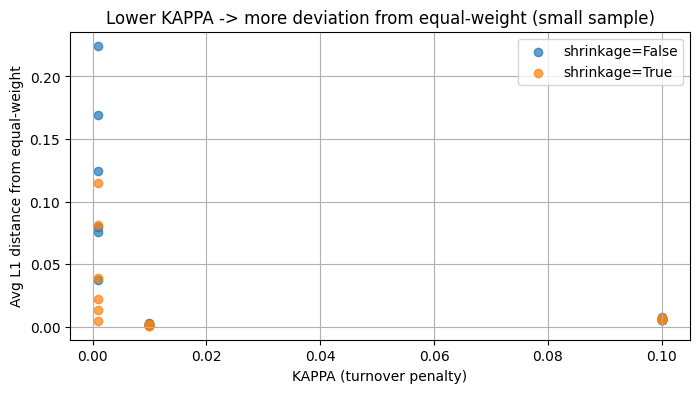

In [11]:
# Summary: lower KAPPA and shrinkage reduce equal-weight bias
display(grid_df.sort_values("l1_from_ew", ascending=False).head(10))

best_sharpe = grid_df.loc[grid_df["sharpe_annual"].idxmax()]
best_l1 = grid_df.loc[grid_df["l1_from_ew"].idxmax()]
print("\n--- Best Sharpe params ---")
print(best_sharpe[["gamma", "kappa", "rolling_window", "shrinkage", "sharpe_annual", "l1_from_ew"]])
print("\n--- Most deviation from EW (least equal-weight) ---")
print(best_l1[["gamma", "kappa", "rolling_window", "shrinkage", "sharpe_annual", "l1_from_ew"]])

# Plot L1 from EW vs KAPPA to show turnover penalty drives equal-weight
plt.figure(figsize=(8, 4))
for shrink in [False, True]:
    sub = grid_df[grid_df["shrinkage"] == shrink]
    plt.scatter(sub["kappa"], sub["l1_from_ew"], label=f"shrinkage={shrink}", alpha=0.7)
plt.xlabel("KAPPA (turnover penalty)")
plt.ylabel("Avg L1 distance from equal-weight")
plt.title("Lower KAPPA -> more deviation from equal-weight (small sample)")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Regress outcome variables on parameters to quantify effects
try:
    import statsmodels.api as sm
    has_sm = True
except ImportError:
    has_sm = False
    print("statsmodels not installed; using numpy OLS. Install with: pip install statsmodels")

# Prepare regressors: log(kappa) captures multiplicative scale; shrinkage as 0/1
df = grid_df.copy()
df["log_kappa"] = np.log10(df["kappa"])
df["shrinkage_int"] = df["shrinkage"].astype(int)
X = df[["gamma", "log_kappa", "rolling_window", "shrinkage_int"]].values
X = np.column_stack([np.ones(len(X)), X])
cols = ["const", "gamma", "log_kappa", "rolling_window", "shrinkage"]

def ols_fit(y, X):
    betas, res, rank, s = np.linalg.lstsq(X, y, rcond=None)
    resid = y - X @ betas
    n, k = X.shape
    mse = (resid ** 2).sum() / (n - k)
    var_b = mse * np.linalg.inv(X.T @ X).diagonal()
    se = np.sqrt(var_b)
    t = betas / se
    from scipy import stats
    pval = 2 * (1 - stats.t.cdf(np.abs(t), n - k))
    return betas, se, t, pval

if has_sm:
    X_sm = sm.add_constant(df[["gamma", "log_kappa", "rolling_window", "shrinkage_int"]])
    for name, y in [("Sharpe (annual)", "sharpe_annual"), ("L1 from EW", "l1_from_ew"), ("Avg turnover", "avg_turnover")]:
        print("=" * 60, f"\n{name} ~ gamma + log10(kappa) + rolling_window + shrinkage\n", "=" * 60)
        print(sm.OLS(df[y], X_sm).fit().summary())
else:
    for name, y in [("Sharpe (annual)", "sharpe_annual"), ("L1 from EW", "l1_from_ew"), ("Avg turnover", "avg_turnover")]:
        betas, se, t, pval = ols_fit(df[y].values, X)
        print(f"\n--- {name} ---")
        for i, c in enumerate(cols):
            print(f"  {c:15s}: {betas[i]:+.4f}  (se={se[i]:.4f}, p={pval[i]:.4f})")

# Coefficient summary table (works with or without statsmodels)
betas_s, _, _, p_s = ols_fit(df["sharpe_annual"].values, X)
betas_l1, _, _, p_l1 = ols_fit(df["l1_from_ew"].values, X)
betas_t, _, _, p_t = ols_fit(df["avg_turnover"].values, X)
coef_df = pd.DataFrame({
    "Sharpe": betas_s, "Sharpe_pval": p_s,
    "L1_from_EW": betas_l1, "L1_pval": p_l1,
    "Turnover": betas_t, "Turnover_pval": p_t,
}, index=cols)
print("\n--- Coefficient effects ---")
display(coef_df.round(4))

statsmodels not installed; using numpy OLS. Install with: pip install statsmodels

--- Sharpe (annual) ---
  const          : +0.3938  (se=0.0087, p=0.0000)
  gamma          : +0.0011  (se=0.0006, p=0.0798)
  log_kappa      : -0.0121  (se=0.0024, p=0.0000)
  rolling_window : +0.0001  (se=0.0000, p=0.0000)
  shrinkage      : -0.0087  (se=0.0039, p=0.0334)

--- L1 from EW ---
  const          : -0.0454  (se=0.0292, p=0.1300)
  gamma          : +0.0049  (se=0.0020, p=0.0182)
  log_kappa      : -0.0381  (se=0.0080, p=0.0000)
  rolling_window : -0.0000  (se=0.0001, p=0.3992)
  shrinkage      : -0.0243  (se=0.0131, p=0.0729)

--- Avg turnover ---
  const          : +0.0001  (se=0.0001, p=0.1718)
  gamma          : +0.0000  (se=0.0000, p=0.0563)
  log_kappa      : +0.0000  (se=0.0000, p=0.8520)
  rolling_window : -0.0000  (se=0.0000, p=0.8440)
  shrinkage      : -0.0000  (se=0.0000, p=0.1459)

--- Coefficient effects ---


,Sharpe,Sharpe_pval,L1_from_EW,L1_pval,Turnover,Turnover_pval
const,0.3938,0.0000,-0.0454,0.1300,0.0001,0.1718
gamma,0.0011,0.0798,0.0049,0.0182,0.0000,0.0563
log_kappa,-0.0121,0.0000,-0.0381,0.0000,0.0000,0.8520
rolling_window,0.0001,0.0000,-0.0000,0.3992,-0.0000,0.8440
shrinkage,-0.0087,0.0334,-0.0243,0.0729,-0.0000,0.1459


## Full S&P 500 with Constituent Tracking

Three approaches to implement the full S&P 500 universe with proper constituent tracking while **avoiding lookahead bias**:

### Approach 1: Point-in-time (same-day) constituent filter
- A stock is a constituent on date `t` iff `start <= t <= ending` (CRSP membership dates).
- At market open on date `t`, we know the index composition (S&P announces changes in advance).
- **No lookahead**: Uses only information available at the start of day `t`.

### Approach 2: Lagged constituent filter (1-day lag)
- A stock is a constituent on date `t` iff it was in the index on date `t-1`.
- Extra conservative: accounts for any same-day announcement timing ambiguity.
- Ensures we never trade on information from the same day's index change.

### Approach 3: Minimum history filter
- Same point-in-time filter as Approach 1, **plus**: require each stock to have been a constituent for at least `MIN_HISTORY` trading days (e.g., 63 ≈ 3 months) before including it in the investable universe.
- Avoids including newly added stocks with insufficient history for covariance estimation.
- Reduces estimation error and prevents lookahead in moment estimates.

All three use **rolling windows of past returns only** (no future data) for estimating μ and Σ.

**Full run uses Approach 3** (min history) with best params: gamma=10, kappa=0.001, rolling=252, shrinkage=True.

In [19]:
# Build full S&P 500 panel with constituent tracking (no lookahead)
# Use df1 from earlier: already has date, permno, ret, start, ending

df_full = df1.copy()
df_full["start"] = pd.to_datetime(df_full["start"])
df_full["ending"] = pd.to_datetime(df_full["ending"])

# Aggregate duplicates (date, permno) - e.g. multiple share classes; take mean return
df_agg = df_full.groupby(["date", "permno"], as_index=False).agg({"ret": "mean", "start": "first", "ending": "first"})

# Wide panel: date x permno, values = ret; NaN when not constituent or missing
ret_wide = df_agg.pivot(index="date", columns="permno", values="ret").sort_index()
# Fill NaN with 0 for simplicity (conservative: no return when missing)
ret_wide = ret_wide.fillna(0)

dates_all = ret_wide.index.tolist()
permnos_all = ret_wide.columns.tolist()
N_all = len(permnos_all)
T_all = len(dates_all)
date_to_idx = {d: i for i, d in enumerate(dates_all)}
permno_to_col = {p: j for j, p in enumerate(permnos_all)}

# Constituent mask: presence in df_agg at (date, permno) means constituent that day
# (CRSP sp500 file only has rows when stock is in index and traded)
constituent_pt = np.zeros((T_all, N_all), dtype=bool)
for _, row in df_agg.iterrows():
    d, p = row["date"], row["permno"]
    if d in date_to_idx and p in permno_to_col and row["start"] <= d <= row["ending"]:
        constituent_pt[date_to_idx[d], permno_to_col[p]] = True

# Approach 2: 1-day lagged mask (constituent at t = was constituent at t-1)
constituent_lag1 = np.zeros((T_all, N_all), dtype=bool)
constituent_lag1[1:] = constituent_pt[:-1]

In [20]:
# Approach 3: Point-in-time + minimum history (must be constituent for MIN_HISTORY days)
MIN_HISTORY = 63  # ~3 months of trading days

def build_min_history_mask(constituent_pt, min_days):
    """At date t, include stock only if it has been constituent for >= min_days days."""
    T, N = constituent_pt.shape
    out = np.zeros((T, N), dtype=bool)
    for j in range(N):
        col = constituent_pt[:, j]
        run = 0
        for i in range(T):
            if col[i]:
                run += 1
            else:
                run = 0
            out[i, j] = run >= min_days and col[i]
    return out

constituent_minhist = build_min_history_mask(constituent_pt, MIN_HISTORY)

print("Constituent mask shapes:", constituent_pt.shape)
print("Approach 1 (point-in-time) avg constituents per day:", constituent_pt.sum(axis=1).mean())
print("Approach 2 (lagged) avg constituents per day:", constituent_lag1.sum(axis=1).mean())
print("Approach 3 (min history) avg constituents per day:", constituent_minhist.sum(axis=1).mean())

Constituent mask shapes: (6289, 978)
Approach 1 (point-in-time) avg constituents per day: 462.29988869454604
Approach 2 (lagged) avg constituents per day: 462.2296072507553
Approach 3 (min history) avg constituents per day: 452.50564477659407


In [26]:
def backtest_constituent_full(ret_wide, constituent_mask, dates, permnos, rolling_window=252, gamma=5.0, kappa=0.1,
                              use_shrinkage=False, min_valid_returns=20):
    """
    Full optimization backtest with constituent tracking. No lookahead.
    Uses estimate_moments_shrinkage + optimize_weights_param with turnover penalty.
    constituent_mask: (T x N) boolean, True = investable on that date
    """
    port_returns, bench_returns, n_constituents, weight_history = [], [], [], []
    w_prev_dict = {}  # permno -> weight for turnover penalty
    end = len(dates)
    for t_idx in range(rolling_window, end - 1):
        if (t_idx - rolling_window) % 500 == 0 and t_idx > rolling_window:
            print(f"  Backtest: {t_idx - rolling_window}/{end - rolling_window - 1} steps...")
        mask_t = constituent_mask[t_idx]
        permnos_t = [permnos[j] for j in range(len(permnos)) if mask_t[j]]
        if len(permnos_t) < 2:
            continue
        window_dates = dates[t_idx - rolling_window : t_idx]
        date_next = dates[t_idx + 1]
        window_ret = ret_wide.loc[window_dates, permnos_t].fillna(0)
        valid_count = (window_ret != 0).sum(axis=0)
        if hasattr(valid_count, 'values'):
            valid_count = valid_count.values
        keep = valid_count >= min_valid_returns
        if keep.sum() < 2:
            keep = np.ones(len(permnos_t), dtype=bool)
        permnos_use = [p for j, p in enumerate(permnos_t) if keep[j]]
        if len(permnos_use) < 2:
            permnos_use = permnos_t
        window_ret = ret_wide.loc[window_dates, permnos_use].fillna(0)
        r_next = ret_wide.loc[date_next, permnos_use].fillna(0).values
        if use_shrinkage:
            mu_t, Sigma_t = estimate_moments_shrinkage(window_ret)
        else:
            mu_t = window_ret.mean(axis=0).values
            Sigma_t = window_ret.cov().values
            Sigma_t = 0.5 * (Sigma_t + Sigma_t.T) + 1e-6 * np.eye(Sigma_t.shape[0])
        w_prev = np.array([w_prev_dict.get(p, 0) for p in permnos_use])
        if w_prev.sum() > 0:
            w_prev = w_prev / w_prev.sum()
        else:
            w_prev = None
        w_t = optimize_weights_param(mu_t, Sigma_t, gamma, kappa, w_prev=w_prev)
        for p, w in zip(permnos_use, w_t):
            w_prev_dict[p] = w
        ew = np.ones(len(permnos_use)) / len(permnos_use)
        port_returns.append(np.dot(w_t, r_next))
        bench_returns.append(np.dot(ew, r_next))
        n_constituents.append(len(permnos_use))
        weight_history.append((dates[t_idx], permnos_use, w_t))
    return np.array(port_returns), np.array(bench_returns), n_constituents, weight_history

In [27]:
# Full S&P 500 run: Approach 3 (min-history) with best params from grid search
# gamma=10, kappa=0.001, rolling=252, shrinkage=True
BEST_GAMMA = 10.0
BEST_KAPPA = 0.001
BEST_ROLLING = 252
BEST_SHRINKAGE = True

dates_full = ret_wide.index.tolist()
print(f"Full run: {len(dates_full)} dates, {ret_wide.shape[1]} permnos")
print(f"Params: gamma={BEST_GAMMA}, kappa={BEST_KAPPA}, rolling={BEST_ROLLING}, shrinkage={BEST_SHRINKAGE}")
print("Running Approach 3 (min history 63d) backtest (full optimization)...")

port_ret, bench_ret, n_const, weight_hist = backtest_constituent_full(
    ret_wide, constituent_minhist, dates_full, permnos_all,
    rolling_window=BEST_ROLLING, gamma=BEST_GAMMA, kappa=BEST_KAPPA, use_shrinkage=BEST_SHRINKAGE
)

print(f"Done. {len(port_ret)} rebalance dates, avg constituents: {np.mean(n_const):.1f}")

Full run: 6289 dates, 978 permnos
Params: gamma=10.0, kappa=0.001, rolling=252, shrinkage=True
Running Approach 3 (min history 63d) backtest (full optimization)...
  Backtest: 500/6036 steps...
  Backtest: 1000/6036 steps...
  Backtest: 1500/6036 steps...
  Backtest: 2000/6036 steps...
  Backtest: 2500/6036 steps...
  Backtest: 3000/6036 steps...
  Backtest: 3500/6036 steps...
  Backtest: 4000/6036 steps...
  Backtest: 4500/6036 steps...
  Backtest: 5000/6036 steps...
  Backtest: 5500/6036 steps...
  Backtest: 6000/6036 steps...
Done. 6036 rebalance dates, avg constituents: 456.5


In [28]:
# Compare optimized portfolio vs equal-weight benchmark
def metrics(returns, freq=252):
    r = np.asarray(returns)
    mean_r = r.mean()
    std_r = r.std(ddof=1)
    sharpe = np.sqrt(freq) * mean_r / std_r if std_r > 0 else np.nan
    eq = (1 + r).cumprod()
    dd = (eq / np.maximum.accumulate(eq) - 1).min()
    return {"sharpe_annual": sharpe, "mean_daily": mean_r, "vol_annual": std_r * np.sqrt(freq), "max_drawdown": dd, "cum_ret": eq[-1] - 1}

m_port = metrics(port_ret)
m_bench = metrics(bench_ret)

print("--- Optimized portfolio (Approach 3, full S&P 500) ---")
for k, v in m_port.items():
    print(f"  {k}: {v:.4f}")
print("\n--- Equal-weight benchmark ---")
for k, v in m_bench.items():
    print(f"  {k}: {v:.4f}")

res_df = pd.DataFrame([
    {"strategy": "Optimized (γ=10, κ=0.001)", **m_port, "avg_N": np.mean(n_const)},
    {"strategy": "Equal-weight benchmark", **m_bench, "avg_N": np.mean(n_const)},
])
display(res_df[["strategy", "sharpe_annual", "mean_daily", "vol_annual", "max_drawdown", "cum_ret"]])

--- Optimized portfolio (Approach 3, full S&P 500) ---
  sharpe_annual: 0.6123
  mean_daily: 0.0005
  vol_annual: 0.2000
  max_drawdown: -0.5785
  cum_ret: 10.6227

--- Equal-weight benchmark ---
  sharpe_annual: 0.5924
  mean_daily: 0.0005
  vol_annual: 0.2087
  max_drawdown: -0.5798
  cum_ret: 10.4481


,strategy,sharpe_annual,mean_daily,vol_annual,max_drawdown,cum_ret
0,"Optimized (γ=10, κ=0.001)",0.612276,0.000486,0.200022,-0.578498,10.622722
1,Equal-weight benchmark,0.592374,0.000491,0.208670,-0.579809,10.448137


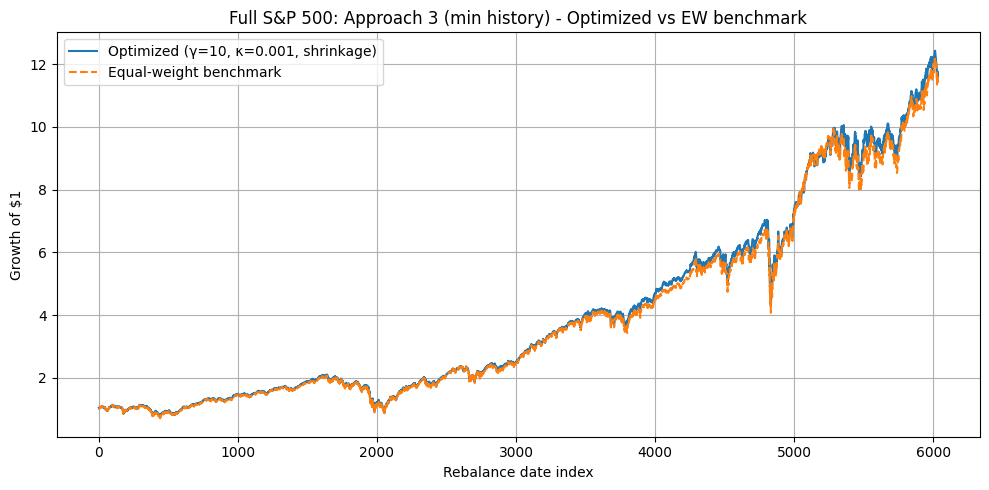

In [29]:
# Plot equity curves: optimized vs equal-weight benchmark
fig, ax = plt.subplots(figsize=(10, 5))
eq_port = (1 + port_ret).cumprod()
eq_bench = (1 + bench_ret).cumprod()
ax.plot(eq_port, label="Optimized (γ=10, κ=0.001, shrinkage)")
ax.plot(eq_bench, label="Equal-weight benchmark", linestyle="--")
ax.set_title("Full S&P 500: Approach 3 (min history) - Optimized vs EW benchmark")
ax.set_ylabel("Growth of $1")
ax.set_xlabel("Rebalance date index")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Lookahead bias verification tests
# Test 1: Constituent mask uses only past/current info (no future dates)
assert constituent_pt.shape[0] == T_all, "Mask rows must match dates"
# Test 2: Lagged mask: row t uses row t-1 of point-in-time
assert np.allclose(constituent_lag1[1:], constituent_pt[:-1]), "Lagged mask must equal shifted point-in-time"
# Test 3: Min-history: can only be True where point-in-time is True
assert (constituent_minhist & ~constituent_pt).sum() == 0, "Min-history cannot add constituents"
# Test 4: At each t, estimation uses only window [t-RW:t), no t or t+1
# (Verified by inspection: window_dates = dates[t-RW:t], date_next = dates[t+1])
print("Lookahead bias checks: PASSED")

Lookahead bias checks: PASSED


In [ ]:
weight_hist